#ML w/ sklearn

##Part 1: Reading in the data

In [ ]:
import pandas as pd

df = pd.read_csv("/content/sample_data/auto.csv")

print("First Few Lines:")
print(df.head())
print()
print("Dimensions:",df.shape)

First Few Lines:
    mpg  cylinders  displacement  horsepower  weight  acceleration  year  \
0  18.0          8         307.0         130    3504          12.0  70.0   
1  15.0          8         350.0         165    3693          11.5  70.0   
2  18.0          8         318.0         150    3436          11.0  70.0   
3  16.0          8         304.0         150    3433          12.0  70.0   
4  17.0          8         302.0         140    3449           NaN  70.0   

   origin                       name  
0       1  chevrolet chevelle malibu  
1       1          buick skylark 320  
2       1         plymouth satellite  
3       1              amc rebel sst  
4       1                ford torino  

Dimensions: (392, 9)


##Part 2: Data Exploration

In [ ]:
# MPG Stats:
# Avg: 23.445, Range: 37.6
print("MPG Description:")
print(df['mpg'].describe())

# Weight Stats:
# Avg: 2977.584, Range: 3527
print("\nWeight Description:")
print(df['weight'].describe())

# Year Stats:
# Avg: 76.010, Range: 12
print("\nYear Description:")
print(df['year'].describe())

MPG Description:
count    392.000000
mean      23.445918
std        7.805007
min        9.000000
25%       17.000000
50%       22.750000
75%       29.000000
max       46.600000
Name: mpg, dtype: float64

Weight Description:
count     392.000000
mean     2977.584184
std       849.402560
min      1613.000000
25%      2225.250000
50%      2803.500000
75%      3614.750000
max      5140.000000
Name: weight, dtype: float64

Year Description:
count    390.000000
mean      76.010256
std        3.668093
min       70.000000
25%       73.000000
50%       76.000000
75%       79.000000
max       82.000000
Name: year, dtype: float64


Average and Range found for each column

MPG:
* Average: 23.445
* Range: 37.6

Weight:
* Average 2977.584
* Range: 3527

Year:
* Average: 76.010
* Range: 12

##Part 3: Data Type Exploration

In [ ]:
print("Types Before Change:")
print(df.dtypes)


df.cylinders = df.cylinders.astype('category').cat.codes
df.origin = df.origin.astype('category')

print("\nTypes After Change:")
print(df.dtypes)

Types Before Change:
mpg             float64
cylinders         int64
displacement    float64
horsepower        int64
weight            int64
acceleration    float64
year            float64
origin            int64
name             object
dtype: object

Types After Change:
mpg              float64
cylinders           int8
displacement     float64
horsepower         int64
weight             int64
acceleration     float64
year             float64
origin          category
name              object
dtype: object


##Part 4: Remove NAs

In [ ]:
df = df.dropna()
print(df.shape)

(389, 9)


removed 3 rows

##Part 5: Modify Columns

In [ ]:
avg_mpg = sum(df['mpg'])/len(df['mpg'])
mpg_high = [(1 if m > avg_mpg else 0) for m in df['mpg']]
df['mpg_high'] = mpg_high
del mpg_high

df.mpg_high = df.mpg_high.astype('category')

df = df.drop('mpg', axis=1)
df = df.drop('name', axis=1)

print(df.head())

   cylinders  displacement  horsepower  weight  acceleration  year origin  \
0          4         307.0         130    3504          12.0  70.0      1   
1          4         350.0         165    3693          11.5  70.0      1   
2          4         318.0         150    3436          11.0  70.0      1   
3          4         304.0         150    3433          12.0  70.0      1   
6          4         454.0         220    4354           9.0  70.0      1   

  mpg_high  
0        0  
1        0  
2        0  
3        0  
6        0  


##Part 6: Exploration w/ Graphs

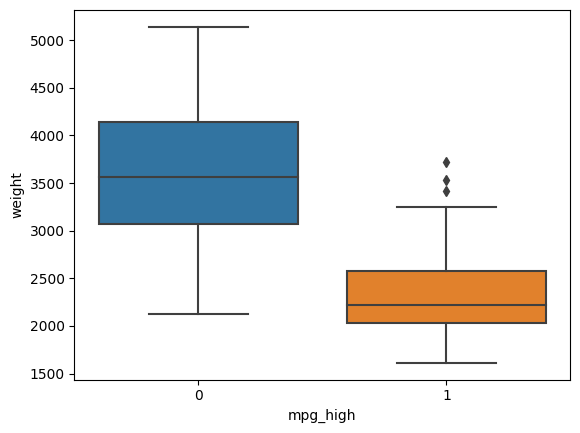

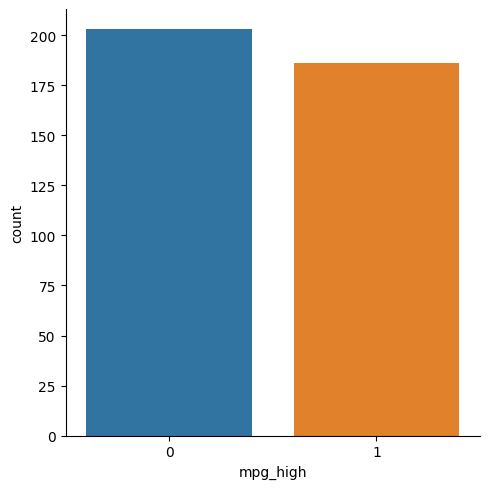

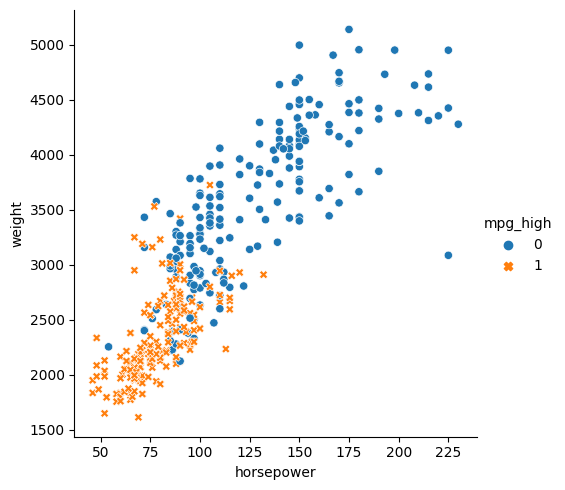

In [ ]:
import seaborn as sb

sb.boxplot(x="mpg_high", y="weight", data=df)

sb.catplot(x="mpg_high",kind="count",data=df)

sb.relplot(x="horsepower", y="weight", data=df, hue=df.mpg_high, style=df.mpg_high)

Each Graph:

* Boxplot: The boxplot shows us that the above average mpg vehicles are also generally lighters with a few outliers

* Bar Graph: The bar graph shows us that our data is fairly evenly split between above and below average mpg, with few more below average. This makes sense logically because there is possibility of mpg outliers to skew the average up

* Scatter Plot: The scatter plot shows us that generally even with lower horsepower, lower weight cars have above average mpg

##Part 7: Train/Test Split

In [ ]:
from sklearn.model_selection import train_test_split

X = df.iloc[:, 0:7]
y = df.iloc[:, 7]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1234)

print('train size:', X_train.shape)
print('test size:', X_test.shape)



train size: (311, 7)
test size: (78, 7)


###Extra Function for Later

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
def report(pred):
  # evaluate
  print('accuracy score: ', accuracy_score(y_test, pred))
  print('precision score: ', precision_score(y_test, pred))
  print('recall score: ', recall_score(y_test, pred))
  print('f1 score: ', f1_score(y_test, pred))

##Part 8: Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression(max_iter=1000, random_state=1234)
clf.fit(X_train, y_train)
clf.score(X_train, y_train)

# make predictions
pred = clf.predict(X_test)
report(pred)


accuracy score:  0.8846153846153846
precision score:  0.7567567567567568
recall score:  1.0
f1 score:  0.8615384615384616


##Part 9: Decision Tree

accuracy score:  0.9230769230769231
precision score:  0.8666666666666667
recall score:  0.9285714285714286
f1 score:  0.896551724137931


[Text(0.6433823529411765, 0.9444444444444444, 'x[0] <= 0.284\ngini = 0.5\nsamples = 311\nvalue = [153, 158]'),
 Text(0.4338235294117647, 0.8333333333333334, 'x[2] <= -0.043\ngini = 0.239\nsamples = 173\nvalue = [24, 149]'),
 Text(0.27941176470588236, 0.7222222222222222, 'x[5] <= -0.15\ngini = 0.179\nsamples = 161\nvalue = [16, 145]'),
 Text(0.14705882352941177, 0.6111111111111112, 'x[1] <= -0.673\ngini = 0.362\nsamples = 59\nvalue = [14, 45]'),
 Text(0.058823529411764705, 0.5, 'x[4] <= -0.683\ngini = 0.159\nsamples = 46\nvalue = [4, 42]'),
 Text(0.029411764705882353, 0.3888888888888889, 'gini = 0.0\nsamples = 2\nvalue = [2, 0]'),
 Text(0.08823529411764706, 0.3888888888888889, 'x[3] <= -0.299\ngini = 0.087\nsamples = 44\nvalue = [2, 42]'),
 Text(0.058823529411764705, 0.2777777777777778, 'x[3] <= -0.674\ngini = 0.045\nsamples = 43\nvalue = [1, 42]'),
 Text(0.029411764705882353, 0.16666666666666666, 'gini = 0.0\nsamples = 38\nvalue = [0, 38]'),
 Text(0.08823529411764706, 0.166666666666666

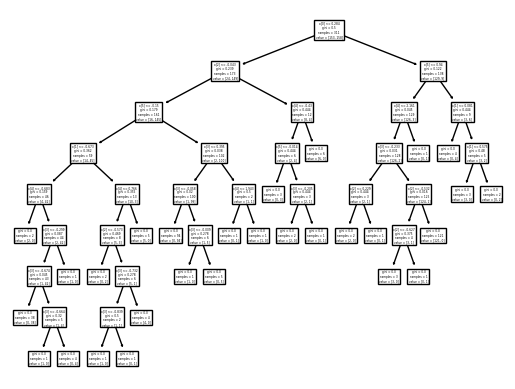

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

clf = DecisionTreeClassifier(random_state=1234)
clf.fit(X_train, y_train)

# make predictions
pred = clf.predict(X_test)
report(pred)

tree.plot_tree(clf)

##Part 10: Neural Network

In [ ]:
# scale the data using sklearn functionality
from sklearn import preprocessing
from sklearn.neural_network import MLPClassifier

scaler = preprocessing.StandardScaler().fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

###Model 1:


In [ ]:
# train the algorithm
clf = MLPClassifier(solver='lbfgs', hidden_layer_sizes=(5), max_iter=1000, random_state=1234)
clf.fit(X_train, y_train)

# make predictions
pred = clf.predict(X_test)
report(pred)

accuracy score:  0.8589743589743589
precision score:  0.7575757575757576
recall score:  0.8928571428571429
f1 score:  0.819672131147541


###Model 2:

In [ ]:
# train the algorithm
clf = MLPClassifier(solver='lbfgs', hidden_layer_sizes=(5,3), max_iter=2000, random_state=1234)
clf.fit(X_train, y_train)

# make predictions
pred = clf.predict(X_test)
report(pred)

accuracy score:  0.8974358974358975
precision score:  0.8125
recall score:  0.9285714285714286
f1 score:  0.8666666666666666


Model 2 performed better than Model 1 (higher on all metrics) because it has more iterations and an extra hidden layer


##Part 11: Analysis

The decision tree model seemed to work best here, having an accuracy of .923, however all the models have similiar accuracies (.885 and .897) and one may improve over the others just by changing the random state value. Decision trees throw out variables that they deem to be irrelvant so, that could explain why it outperformed the other models.

Compared to R, sklearn seems a bit easier. All classification models have similiar/identical methods and attributes so it is very easy to make multiple models
